# Loading Modules

In [160]:
#import & alias modules
import math 
import pandas as pd
from scipy import stats
import seaborn as sns 
import matplotlib.pyplot as plt
!pip install bioinfokit
from bioinfokit.analys import stat #necessary for Tukey test
!pip install scikit-posthocs
import scikit_posthocs as sp #necessary for Dunn test
import numpy as np

sns.set(style = 'ticks')

# Mounting Drive

In [ ]:
#mounting personal google drive
from google.colab import drive
drive.mount ('/content/gdrive')

# Data Set

In [ ]:
#read in data
sad = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/Data Sets/SAD -- Stress Annotated Data set/SAD_v1.xlsx')

#information about dataframe
sad.info() 

# Article describing data set: https://www.eecis.udel.edu/~mlm/docs/2021-Mauriello-CHI-StressAnnotatedDataset-Abstract.pdf
# Data set available on github within a zip file: https://github.com/PervasiveWellbeingTech/Stress-Annotated-Dataset-SAD
# Data set: https://docs.google.com/spreadsheets/d/1liPZOMEYDm8VTRxOEAMSJVEjE6yPnoH3/edit?usp=sharing&ouid=104731676791096651412&rtpof=true&sd=true
# Data set features: https://drive.google.com/file/d/1s4SE7YEoV-niAu0E5XFyCiCNcUP_5M7i/view?usp=sharing
#
# Data was loaded through my personal google drive since the original source had to be downloaded and unzipped 
#
# NOTE: 'Other' in this data indicates stressors that do not fit into the other eight categories.
#       This category includes stressors such as politics.
#       
# Analyses hereafter are based on 'top_label'.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6850 entries, 0 to 6849
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   sID                                6850 non-null   int64  
 1   sentence                           6850 non-null   object 
 2   is_stressor                        6850 non-null   int64  
 3   is_stressor_conf                   6850 non-null   float64
 4   is_covid                           6850 non-null   int64  
 5   is_covid_conf                      6850 non-null   float64
 6   original_label                     6850 non-null   object 
 7   top_label                          6850 non-null   object 
 8   second_label                       6850 non-null   object 
 9   avg_severity                       6850 non-null   float64
 10  median_severity                    6850 non-null   int64  
 11  SD_severity                        6850 non-null   float

# Data Corrections

In [ ]:
#correcting 'original_label','top_label','second_label', and 'Source' to Dtype 'category'.
sad[['original_label','top_label','second_label','Source']] = sad[['original_label','top_label','second_label','Source']].astype('category')

#correcting 'is_stressor','is_covid', and 'is_seed' to Dtype 'bool[ean]'.
sad[['is_stressor','is_covid','is_seed']] = sad[['is_stressor','is_covid','is_seed']].astype('bool')

In [ ]:
#ensure conversions were successful
sad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6850 entries, 0 to 6849
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   sID                                6850 non-null   int64   
 1   sentence                           6850 non-null   object  
 2   is_stressor                        6850 non-null   bool    
 3   is_stressor_conf                   6850 non-null   float64 
 4   is_covid                           6850 non-null   bool    
 5   is_covid_conf                      6850 non-null   float64 
 6   original_label                     6850 non-null   category
 7   top_label                          6850 non-null   category
 8   second_label                       6850 non-null   category
 9   avg_severity                       6850 non-null   float64 
 10  median_severity                    6850 non-null   int64   
 11  SD_severity                        6850 non

# Stress Due to COVID

The COVID-19 pandemic affected (and is still affecting) world health. Not only for those afflicted with the virus, but also healthcare and non-healthcare workers who had to adjust to new work environments, including heightened demands and burdens. Assessing the stress placed upon society during the pandemic may help to allocate funds and resources to provide therapy to those in need, in both acute and chronic stress.

In [ ]:
#descriptive stats of avg_severity, grouped by binary relation to COVID
sad.groupby('is_covid').describe()[['avg_severity']]

avg_severity                                             
                count      mean       std  min  25%  50%  75%  max
is_covid                                                          
False          6185.0  4.012352  1.667218  0.0  3.0  4.0  5.2  9.8
True            665.0  5.017744  1.368047  0.6  4.2  5.0  6.0  9.0

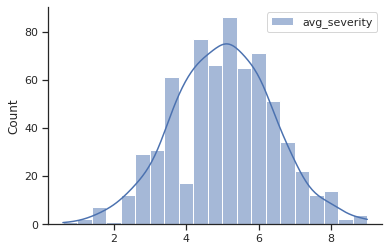

In [ ]:
#visualizing distribution of stress severity related to COVID
sns.histplot(sad[sad['is_covid'] == 1][['avg_severity']] , kde = True)
sns.despine()

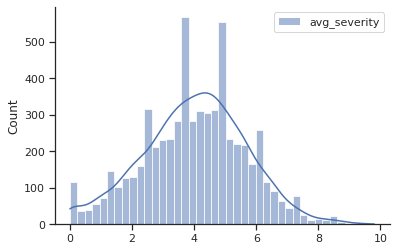

In [ ]:
#visualizing distribution of stress severity not related to COVID
sns.histplot(sad[sad['is_covid'] == 0][['avg_severity']] , kde = True)
sns.despine()

The sample size of both conditions are greater than 30 and both distributions are normal. T-test is valid for analysis.

# Results: Stress Due to COVID (t-test)

In [ ]:
#t-test 
t_stat, t_p = stats.ttest_ind(sad[sad['is_covid'] == 0][['avg_severity']], sad[sad['is_covid'] == 1][['avg_severity']])
print('T-test statistic: ', t_stat[0])
print('p-value: ', t_p[0])

T-test statistic:  -15.016482613997464
p-value:  3.579601275868171e-50


There is a significant difference between the means of avg_severity between stress not related to COVID and stress related to COVID.

In [178]:
lower_0, upper_0 = stats.t.interval(alpha=0.95, df=len(sad[sad['is_covid'] == 0][['avg_severity']])-1, loc=np.mean(sad[sad['is_covid'] == 0][['avg_severity']]), scale=stats.sem(sad[sad['is_covid'] == 0][['avg_severity']]))

In [179]:
lower_1, upper_1 = stats.t.interval(alpha=0.95, df=len(sad[sad['is_covid'] == 1][['avg_severity']])-1, loc=np.mean(sad[sad['is_covid'] == 1][['avg_severity']]), scale=stats.sem(sad[sad['is_covid'] == 1][['avg_severity']]))

In [180]:
print(lower_1 - upper_0)
print(upper_1 - lower_0)

[0.85966671]
[1.15111708]


Text(0.5, 1.08, 'Stress Overall')

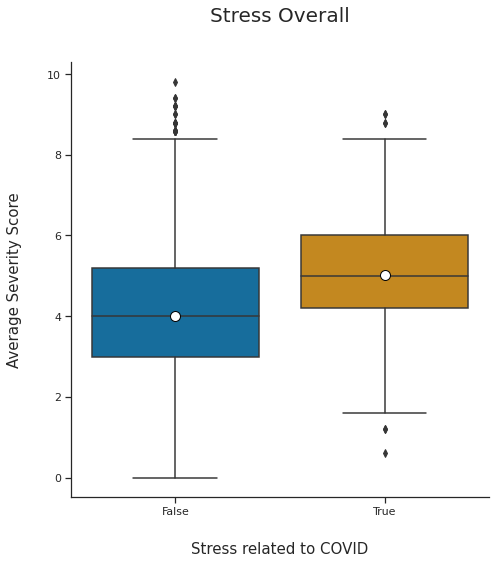

In [ ]:
#visualizing differences
plt.figure(figsize = (7.5,8))
sad_box = sns.boxplot(x = sad['is_covid'], y = sad['avg_severity'], showmeans=True, palette = 'colorblind',meanprops = {"marker" : "o", "markerfacecolor":"white","markeredgecolor":"black","markersize":"10"})
sad_box.set_xlabel('Stress related to COVID', size = 15, labelpad=25)
sad_box.set_ylabel('Average Severity Score', size = 15, labelpad=25)
sns.despine()
plt.title('Stress Overall', size = 20, y = 1.08)


Text(0.5, 1.08, 'Stress')

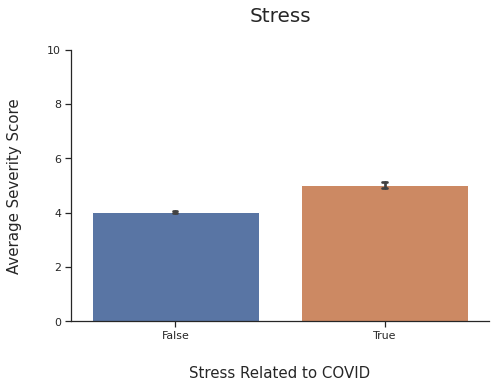

In [ ]:
plt.figure(figsize = (7.5,5))
bar = sns.barplot(x = sad['is_covid'], y = sad['avg_severity'], capsize = 0.02)
bar.set_ylim(0,10)
sns.despine()
plt.xlabel("Stress Related to COVID", size = 15,labelpad = 25 )
plt.ylabel('Average Severity Score', size = 15,labelpad = 25)
plt.title('Stress', size = 20, y = 1.08)

# Differences Between Stressors (Part 1)

Stress is often the result of many factors and each individual may be affected by different stressors. For this particular data set stressors were separated into nine categories. The categories in this dataset are general and apply to most situations. One category, 'other', comprises stressors that cannot be easily associated with the other groupings, like politics. Analyses on differences between stressors may be useful for further applications and analyses such as machine learning or prioritizing services.

In [ ]:
#descriptive statistics per category
sad_labels = sad.groupby('top_label').describe()[['avg_severity']]
sad_labels

avg_severity            ...          
                                         count      mean  ...  75%  max
top_label                                                 ...          
Emotional Turmoil                        667.0  4.731034  ...  5.6  9.2
Everyday Decision Making                 337.0  3.482493  ...  4.2  7.2
Family Issues                            742.0  4.707547  ...  5.8  9.8
Financial Problem                        635.0  5.143307  ...  6.0  9.2
Health, Fatigue, or Physical Pain        782.0  4.439130  ...  5.4  9.4
Other                                    974.0  2.313758  ...  3.4  9.4
School                                   743.0  3.945357  ...  4.8  7.0
Social Relationships                     629.0  3.935771  ...  4.8  8.8
Work                                    1341.0  4.424310  ...  5.4  9.0

[9 rows x 8 columns]

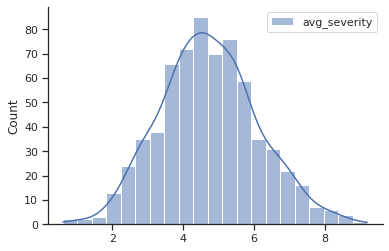

In [ ]:
#histogram plots generated for each category, viz. to determine normal distribution
sns.histplot(sad[sad['top_label'] == 'Emotional Turmoil'][['avg_severity']] , kde = True)
sns.despine()

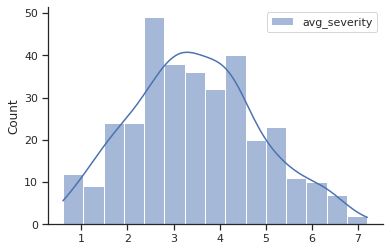

In [ ]:
sns.histplot(sad[sad['top_label'] == 'Everyday Decision Making'][['avg_severity']], kde = True)
sns.despine()

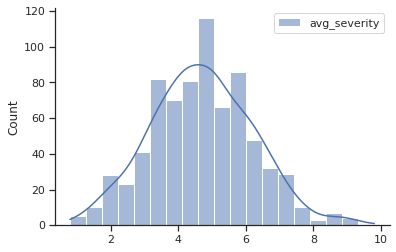

In [ ]:
sns.histplot(sad[sad['top_label'] == 'Family Issues'][['avg_severity']], kde = True)
sns.despine()

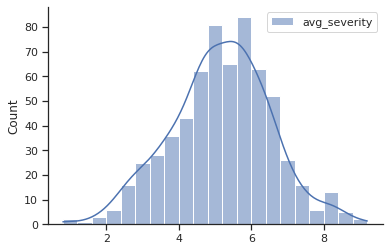

In [ ]:
sns.histplot(sad[sad['top_label'] == 'Financial Problem'][['avg_severity']], kde = True)
sns.despine()

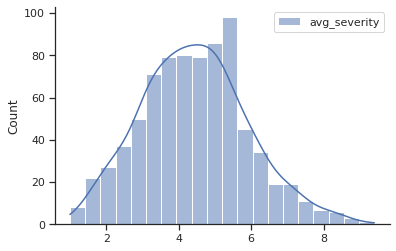

In [ ]:
sns.histplot(sad[sad['top_label'] == 'Health, Fatigue, or Physical Pain'][['avg_severity']], kde = True)
sns.despine()

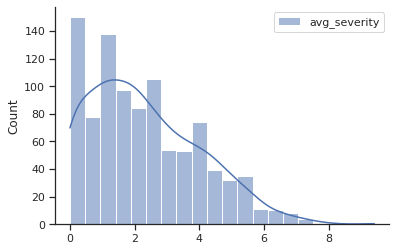

In [ ]:
sns.histplot(sad[sad['top_label'] == 'Other'][['avg_severity']], kde = True)
sns.despine()

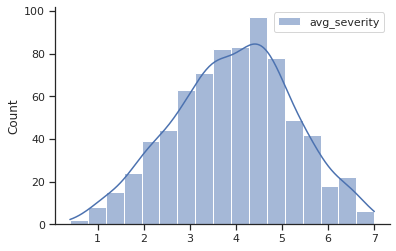

In [ ]:
sns.histplot(sad[sad['top_label'] == 'School'][['avg_severity']], kde = True)
sns.despine()

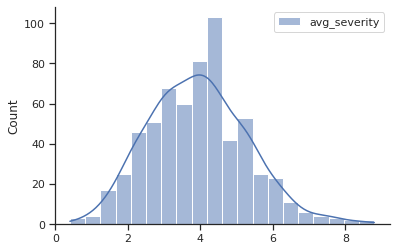

In [ ]:
sns.histplot(sad[sad['top_label'] == 'Social Relationships'][['avg_severity']], kde = True)
sns.despine()

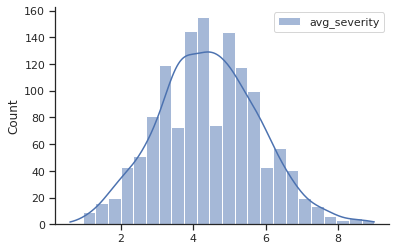

In [ ]:
sns.histplot(sad[sad['top_label'] == 'Work'][['avg_severity']], kde = True)
sns.despine()

The distribution of each category is approximately normal.







In [ ]:
#subsetting groups and transformation into arrays for ease of use in Bartlett test for variance equality
a = sad[sad['top_label'] == 'Emotional Turmoil']['avg_severity'].values
b = sad[sad['top_label'] == 'Everyday Decision Making']['avg_severity'].values
c = sad[sad['top_label'] == 'Family Issues']['avg_severity'].values
d = sad[sad['top_label'] == 'Financial Problem']['avg_severity'].values
e = sad[sad['top_label'] == 'Health, Fatigue, or Physical Pain']['avg_severity'].values
f = sad[sad['top_label'] == 'Other']['avg_severity'].values
g = sad[sad['top_label'] == 'School']['avg_severity'].values
h = sad[sad['top_label'] == 'Social Relationships']['avg_severity'].values
i = sad[sad['top_label'] == 'Work']['avg_severity'].values

In [ ]:
#test for equal variance
b_stat, b_p = stats.bartlett(a, b, c, d, e, f, g, h, i) 
print('Bartlett statistic: ', b_stat)
print('p-value: ', b_p)

Bartlett statistic:  99.75435972479623
p-value:  4.792294372343822e-18


Based on the Bartlett's test and sample size of each group, an ANOVA test may not be an appropriate test. There is at least one group whose variance differs from the others (p = 4.79 x 10^-18; alpha = 0.05) as well as sample size differences between each group (range: 337:1341). Although a one-way ANOVA test may still be used, the results may not be reliable. (ANOVA results are presented in the supplement section, but will not be used for any conclusions)

Therefore, a Kruskal-Wallis test will be used to assess differences between the median 'avg_severity' between each group as the data satisfies all Kruskal-Wallis assumptions and is the equivalent of ANOVA when ANOVA assumptions are not satisfied.

# Results: Differences Between Stressors (Kruskal-Wallis and post-hoc analysis)

In [ ]:
#calculating medians of each group
sad_labels_median = sad.groupby('top_label').median('avg_severity')[['avg_severity']]
sad_labels_median.rename(columns = {'avg_severity' : 'median'})

,median
top_label,
Emotional Turmoil,4.6
Everyday Decision Making,3.4
Family Issues,4.6
Financial Problem,5.2
"Health, Fatigue, or Physical Pain",4.4
Other,2.0
School,4.0
Social Relationships,3.8
Work,4.4


In [ ]:
#Kruskal-Wallis test -- median equality
kw_stat, kw_p = stats.kruskal(a, b, c, d, e, f, g, h, i)
print('Kruskal-Wallis statistic: ', kw_stat)
print('p-value: ', kw_p)

Kruskal-Wallis statistic:  1464.2975174506503
p-value:  7.067432021182e-311


There is at least one group whose median differs from other groups (p = 7.07 x 10^-311; alpha = 0.05).

In [ ]:
#Post-hoc analysis to determine multiple pairwise differences
sp.posthoc_dunn(sad, val_col='avg_severity', group_col='top_label', p_adjust='fdr_bh')

#NOTE: Benjamini-Hochberg method used to adjust p-value, avoiding false negatives
#      (https://www.researchgate.net/post/What_is_your_prefered_p-value_correction_for_multiple_tests 
#       via reply by H. Tigner)

,Emotional Turmoil,Everyday Decision Making,Family Issues,Financial Problem,"Health, Fatigue, or Physical Pain",Other,School,Social Relationships,Work
Emotional Turmoil,1.000000e+00,1.419453e-31,6.367471e-01,1.326209e-06,2.185167e-04,7.723613e-151,2.627835e-19,4.432755e-20,6.070785e-05
Everyday Decision Making,1.419453e-31,1.000000e+00,1.348812e-30,5.673728e-55,2.610296e-19,7.609610e-17,4.563255e-06,6.399270e-05,3.999866e-22
Family Issues,6.367471e-01,1.348812e-30,1.000000e+00,5.006569e-08,9.715576e-04,6.293775e-154,2.461056e-18,3.848640e-19,3.245575e-04
Financial Problem,1.326209e-06,5.673728e-55,5.006569e-08,1.000000e+00,3.427773e-18,7.696322e-212,8.931817e-44,8.068504e-44,1.604830e-21
"Health, Fatigue, or Physical Pain",2.185167e-04,2.610296e-19,9.715576e-04,3.427773e-18,1.000000e+00,6.220809e-120,3.148013e-08,4.133041e-09,9.216867e-01
Other,7.723613e-151,7.609610e-17,6.293775e-154,7.696322e-212,6.220809e-120,1.000000e+00,3.731770e-65,5.673728e-55,1.762827e-156
School,2.627835e-19,4.563255e-06,2.461056e-18,8.931817e-44,3.148013e-08,3.731770e-65,1.000000e+00,5.911277e-01,3.036103e-10
Social Relationships,4.432755e-20,6.399270e-05,3.848640e-19,8.068504e-44,4.133041e-09,5.673728e-55,5.911277e-01,1.000000e+00,3.890363e-11
Work,6.070785e-05,3.999866e-22,3.245575e-04,1.604830e-21,9.216867e-01,1.762827e-156,3.036103e-10,3.890363e-11,1.000000e+00


Three groups are significantly different from all other groups and each other based on medians: 'Everyday Decision Making', 'Financial Problem', 'Other'. 

Three pairs have no statistically significant differences in medians: 'Emotional Turmoil ~ Family Issues' (p = .637), 'Health, Fatigue, or Physical Pain ~ Work'(p = .921), 'School ~ Social Relationships' (p = 0.591).

Text(0.5, 1.08, 'Differences in Stressors')

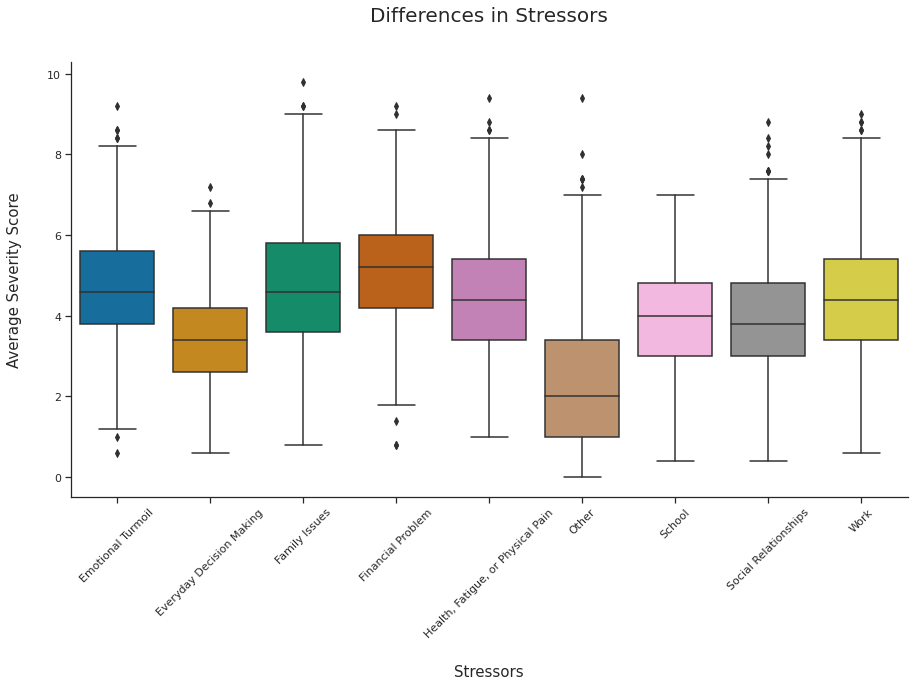

In [ ]:
#Visualizing differences 
plt.figure(figsize = (15,8))
ax = sns.boxplot(x = sad['top_label'], y = sad['avg_severity'], palette = 'colorblind')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
ax.set_xlabel('Stressors', size = 15, labelpad = 25)
ax.set_ylabel('Average Severity Score', size = 15, labelpad=25)
sns.despine()
plt.title('Differences in Stressors', size = 20, y = 1.08)

# Differences Between Stressors (Part 2, including results)

Based on the results of the Kruskal-Wallis test, financial problems, everday decision making, and the category of other were statistically significant from other stressors. 

Focusing on these stressors, their relatedness to COVID may provide insights into what the individuals in this data set may be experiencing as a whole. 

In [ ]:
#descriptive stats -- Financial Problem
sad_fp = sad[sad['top_label'] == 'Financial Problem']
sad_fp.groupby('is_covid').describe()[['avg_severity']]

avg_severity                                              
                count      mean       std  min   25%  50%  75%  max
is_covid                                                           
False           571.0  5.080560  1.362437  0.8  4.20  5.2  6.0  9.2
True             64.0  5.703125  1.350834  2.6  4.75  5.6  6.6  9.0

In [ ]:
#t-test -- Financial Problem
t_stat_fp, t_p_fp = stats.ttest_ind(sad_fp[sad_fp['is_covid'] == 0][['avg_severity']], sad_fp[sad_fp['is_covid'] == 1][['avg_severity']])
print('T-Test statistic: ', t_stat_fp[0])
print('p-value: ', t_p_fp[0])

T-Test statistic:  -3.4694123395770946
p-value:  0.0005570140026454666


There is a statistically significant difference between the means of 'Financial Stress', not related and related to COVID.

In [174]:
lower_fp0, upper_fp0 = stats.t.interval(alpha=0.95, df=len(sad_fp[sad_fp['is_covid'] == 0][['avg_severity']])-1, loc=np.mean(sad_fp[sad_fp['is_covid'] == 0][['avg_severity']]), scale=stats.sem(sad_fp[sad_fp['is_covid'] == 0][['avg_severity']]))

In [173]:
lower_fp1, upper_fp1 = stats.t.interval(alpha=0.95, df=len(sad_fp[sad_fp['is_covid'] == 1][['avg_severity']])-1, loc=np.mean(sad_fp[sad_fp['is_covid'] == 1][['avg_severity']]), scale=stats.sem(sad_fp[sad_fp['is_covid'] == 1][['avg_severity']]))

In [177]:
print(lower_fp1 - upper_fp0)
print(upper_fp1 - lower_fp0)

[0.17314879]
[1.07198037]


Text(0, 0.5, 'Average Severity Score')

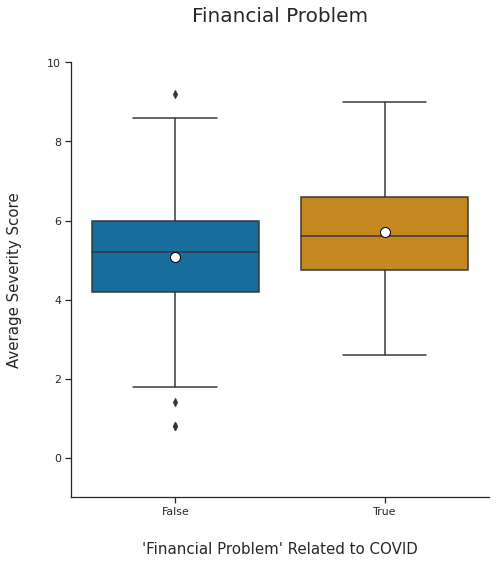

In [ ]:
#visualizing differences -- Financial Problem
plt.figure(figsize = (7.5,8))
f_box = sns.boxplot(x = sad_fp['is_covid'], y = sad_fp['avg_severity'], showmeans = True,  palette = 'colorblind', meanprops = {"marker" : "o", "markerfacecolor":"white","markeredgecolor":"black","markersize":"10"})
f_box.set_ylim(-1,10)
sns.despine()
plt.title('Financial Problem', size = 20, y = 1.08)
plt.xlabel("'Financial Problem' Related to COVID", size = 15, labelpad = 25)
plt.ylabel('Average Severity Score', size = 15, labelpad = 25)

Text(0.5, 1.08, 'Financial Problem')

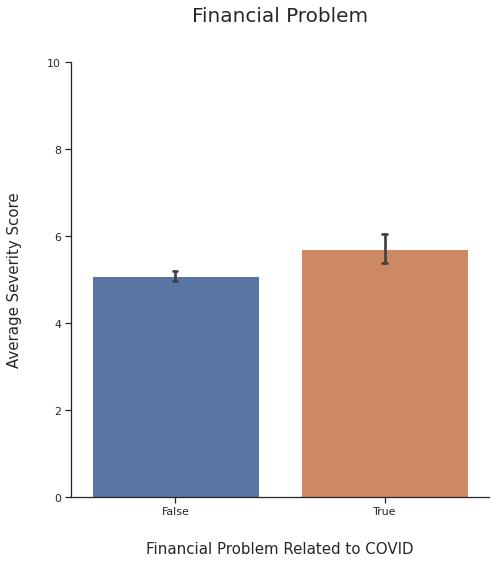

In [ ]:
plt.figure(figsize = (7.5,8))
fp_bar = sns.barplot(x = sad_fp['is_covid'], y = sad_fp['avg_severity'], capsize = 0.02)
fp_bar.set_ylim(0,10)
sns.despine()
plt.xlabel("Financial Problem Related to COVID", size = 15,labelpad = 25 )
plt.ylabel('Average Severity Score', size = 15,labelpad = 25)
plt.title('Financial Problem', size = 20, y = 1.08)

In [ ]:
#descriptive stats -- Everyday Decision Making
sad_edm = sad[sad['top_label'] == 'Everyday Decision Making']
sad_edm.groupby('is_covid').describe()[['avg_severity']]

#sample size for Everyday Decision Making stress related to COVID is small, t-test may not be appropriate

avg_severity                                               
                count      mean       std  min   25%  50%   75%  max
is_covid                                                            
False           317.0  3.444795  1.374225  0.6  2.40  3.4  4.20  7.2
True             20.0  4.080000  1.133973  2.2  3.15  4.2  4.75  6.2

In [ ]:
#descriptive stats -- Other
sad_o = sad[sad['top_label'] == 'Other']
sad_o.groupby('is_covid').describe()[['avg_severity']]

avg_severity                                             
                count      mean       std  min  25%  50%  75%  max
is_covid                                                          
False           904.0  2.196018  1.678206  0.0  0.8  1.8  3.2  9.4
True             70.0  3.834286  1.347449  0.6  2.8  3.8  5.0  6.6

In [ ]:
#Combining 'Everyday Decision Making' to 'Other', since 'Other' is a catch-all category 
filter_list = ['Everyday Decision Making', 'Other']
sad_edmo = sad[sad['top_label'].isin(filter_list)]
sad_edmo.groupby('is_covid').describe()[['avg_severity']]

avg_severity                                              
                count      mean       std  min   25%  50%  75%  max
is_covid                                                           
False          1221.0  2.520229  1.695208  0.0  1.20  2.4  3.8  9.4
True             90.0  3.888889  1.301032  0.6  2.85  4.0  5.0  6.6

In [ ]:
#t-test -- Other + Everyday Decision Making
t_stat_edmo, t_p_edmo = stats.ttest_ind(sad_edmo[sad_edmo['is_covid'] == 0][['avg_severity']], sad_edmo[sad_edmo['is_covid'] == 1][['avg_severity']])
print('T-test statistic: ', t_stat_edmo[0])
print('p-value: ', t_p_edmo[0])

T-test statistic:  -7.497290185869342
p-value:  1.1961019404416994e-13


There is a statistically significant difference between the means of the combined category, unrelated and related to COVID

In [168]:
lower_edmo0, upper_edmo0 = stats.t.interval(alpha=0.95, df=len(sad_edmo[sad_edmo['is_covid'] == 0][['avg_severity']])-1, loc=np.mean(sad_edmo[sad_edmo['is_covid'] == 0][['avg_severity']]), scale=stats.sem(sad_edmo[sad_edmo['is_covid'] == 0][['avg_severity']]))

In [169]:
lower_edmo1, upper_edmo1 = stats.t.interval(alpha=0.95, df=len(sad_edmo[sad_edmo['is_covid'] == 1][['avg_severity']])-1, loc=np.mean(sad_edmo[sad_edmo['is_covid'] == 1][['avg_severity']]), scale=stats.sem(sad_edmo[sad_edmo['is_covid'] == 1][['avg_severity']]))

In [172]:
print(lower_edmo1 - upper_edmo0)
print(upper_edmo1 - lower_edmo0)

[1.00098401]
[1.73633513]


Text(0.5, 1.08, 'Other (inc. Decision Making)')

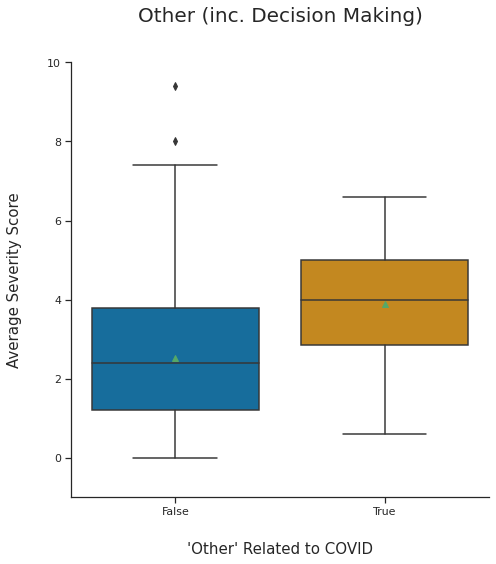

In [ ]:
#visualizing differences
plt.figure(figsize = (7.5,8))
fp_box = sns.boxplot(x = sad_edmo['is_covid'], y = sad_edmo['avg_severity'], showmeans = True, palette = 'colorblind')
fp_box.set_ylim(-1,10)
sns.despine()
plt.xlabel("'Other' Related to COVID", size = 15,labelpad = 25 )
plt.ylabel('Average Severity Score', size = 15,labelpad = 25)
plt.title('Other (inc. Decision Making)', size = 20, y = 1.08)
#plt.tight_layout()
#plt.subplots_adjust()

Text(0.5, 1.08, 'Other (inc. Decision Making)')

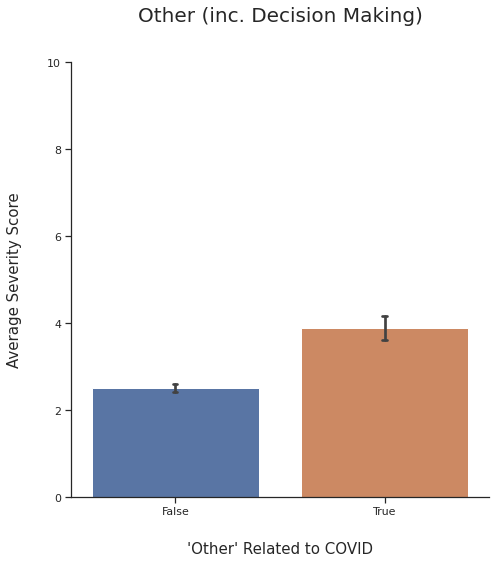

In [ ]:
plt.figure(figsize = (7.5,8))
edmo_bar = sns.barplot(x = sad_edmo['is_covid'], y = sad_edmo['avg_severity'], capsize = 0.02)
edmo_bar.set_ylim(0,10)
sns.despine()
plt.xlabel("'Other' Related to COVID", size = 15,labelpad = 25 )
plt.ylabel('Average Severity Score', size = 15,labelpad = 25)
plt.title('Other (inc. Decision Making)', size = 20, y = 1.08)

# Conclusions

The COVID pandemic has caused stress in many ways. Even though stress is not usually a causative agent in disease, it has the potential to exacerbate disease related symptoms. During the pandemic, there has been vast references to the over-burdening of workers, in both healthcare and non-healthcare. The creators of SAD collected messages/sentences from web sources and their own chatbot. Their data collection occurred before and after the start of the pandemic. However, they did not indicate the date range of their collection phase. Nonetheless, the data provides an opportunity to assess stress.

Analysis of the dataset indicates that stress related to COVID had significantly higher average severity than stress unrelated to COVID (p = 3.58 x 10^-50, alpha = 0.05). Implying that the pandemic had an affect on an individual's well-being as it progressed. When looking at the data set as a whole, regardless of relation to COVID, there was a significant difference in median average severity for all groups with at least one group showing significance (p = 7.07 x 10^-311, alpha = 0.05). This may indicate that stressors tend to have differing severity overall, but it should be noted that stress severity is based on an individual experience. Teasing out which stressors were the most different from other groups, financial problems, everyday decision making, and the category of other were independent of other groups (p-values can be found in the Dunn test post-hoc analysis). To test whether there were differences when related to COVID, the sample size of 'Everyday Decision Making' did not have a significant sample size and was thus combined with 'Other' since 'Other' is a catch-all category. In doing the tests for differences in mean severity both financial problems and other had significantly higher averages when related to COVID.

Overall, for this data set, the effects of COVID are evident. In the creators' analyses of their data, they mention relatedness to COVID may influence their results and future use within chatbots. Although more data is needed to provide a robust training set for their chatbots, the data provides insights and the possibility of other data sets generated in the same manner to analyze trends in stress in various workplaces, schools, and other settings. Using this data, those settings could allocate funds and resources to provide appropriate stress management services. 

# Supplement: ANOVA (calculations provided, but not used for any conclusions)

In [ ]:
sad_labels_vars = sad_labels['avg_severity'][['std']] ** 2
sad_labels_vars.rename(columns = {'std' : 'variance'})

,variance
top_label,
Emotional Turmoil,1.876558
Everyday Decision Making,1.871389
Family Issues,2.310415
Financial Problem,1.885361
"Health, Fatigue, or Physical Pain",2.169376
Other,2.921722
School,1.686228
Social Relationships,1.849244
Work,1.918901


In [ ]:
anova_stat, anova_p = stats.f_oneway(a, b, c, d, e, f, g, h, i) #test for equal mean
anova_stat, anova_p

(282.82795802480354, 0.0)

In [ ]:
res = stat()
res.tukey_hsd(df = sad1, res_var='avg_severity', xfac_var='top_label', anova_model='avg_severity~C(top_label)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Other,Emotional Turmoil,2.520365,2.284142,2.756587,46.818350,0.001
1,Other,Everyday Decision Making,1.248777,0.958036,1.539518,18.847504,0.001
2,Other,Work,2.056003,1.859418,2.252587,45.893173,0.001
3,Other,Social Relationships,1.717834,1.482338,1.953329,32.009083,0.001
4,Other,"Health, Fatigue, or Physical Pain",2.076861,1.842433,2.311288,38.875273,0.001
5,Other,Family Issues,2.485736,2.262114,2.709359,48.776882,0.001
6,Other,School,1.737223,1.514650,1.959796,34.249781,0.001
7,Other,Financial Problem,2.884543,2.646445,3.122641,53.161360,0.001
8,Emotional Turmoil,Everyday Decision Making,1.271587,0.961040,1.582134,17.967746,0.001
9,Emotional Turmoil,Work,0.464362,0.239518,0.689206,9.062537,0.001


In [ ]:
tukey_results = res1.tukey_summary
tukey_results[tukey1_results['p-value'] > 0.05]

,group1,group2,Diff,Lower,Upper,q-value,p-value
12,Emotional Turmoil,Family Issues,0.034628,-0.214202,0.283458,0.610666,0.9
22,Work,"Health, Fatigue, or Physical Pain",0.020858,-0.202099,0.243816,0.410519,0.9
28,Social Relationships,School,0.019389,-0.227805,0.266583,0.344190,0.9
